In [2]:
#we install and import the necessary packages

!pip install spotipy
!pip install bs4
!pip install GetLyrics
!pip install requests
!pip install lyricsgenius

import pandas as pd
import numpy as np
import json
import re
import string
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [74]:
#we first get the sentiments of the current US top 100 charts using the function found on https://towardsdatascience.com/become-a-lyrical-genius-4362e7710e43


class GetLyrics():
    
    def __init__(self, spotify_client_id, spotify_client_secret, user_id, playlist_id, genius_key):
        self.spotify_client_id = '4cc96fc45d75416aa20da85903e19198'
        self.spotify_client_secret = '6e12ebe2abda45479bb3209272514a9e'
        self.user_id = '1137799544'
        self.playlist_id = '1UbqAL3sDDSYUUb6o02vsA' #we need to replace this 13 times for all playlists since we can only get a 100 lyrics at onnce
        self.genius_key = 'rD3CuGP4803Soq7e_lrVrMXEDeI3H1SV-MhlQVp1dKBvv-_lh2gcceQjDeW2_6x3' #we plugin personal spotfiy and genius credentials and playlist id
        
    def get_playlist_info(self):
        token = SpotifyClientCredentials(client_id=self.spotify_client_id,
                                         client_secret=self.spotify_client_secret).get_access_token()
        sp = spotipy.Spotify(token)
        playlist = sp.user_playlist_tracks(self.user_id, self.playlist_id)
        self.playlist = playlist
        return self.playlist
    
    def get_track_names(self):
        track_names = []
        for song in range(len(self.playlist['items'])):
            track_names.append(self.playlist['items'][song]['track']['name'])
        self.track_names = track_names
        return self.track_names
    
    def get_track_artists(self):
        track_artists = []
        for song in range(len(self.playlist['items'])):
            track_artists.append(self.playlist['items'][song]['track']['artists'][0]['name'])
        self.track_artists = track_artists
        return self.track_artists
        
    def request_song_info(self, track_name, track_artist):
        self.track_name = track_name
        self.track_artist = track_artist
        base_url = 'https://api.genius.com'
        headers = {'Authorization': 'Bearer ' + self.genius_key}
        search_url = base_url + '/search'
        data = {'q': track_name + ' ' + track_artist}
        response = requests.get(search_url, data=data, headers=headers)
        self.response = response
        return self.response

    def check_hits(self):
        json = self.response.json()
        remote_song_info = None
        for hit in json['response']['hits']:
            if self.track_artist.lower() in hit['result']['primary_artist']['name'].lower():
                remote_song_info = hit
                break
        self.remote_song_info = remote_song_info
        return self.remote_song_info
    
    def get_url(self):
        song_url = self.remote_song_info['result']['url']
        self.song_url = song_url
        return self.song_url
    
    def scrape_lyrics(self):
        page = requests.get(self.song_url)
        html = BeautifulSoup(page.text, 'html.parser')
        lyrics1 = html.find("div", class_="lyrics")
        lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-2 jgQsqn")
        if lyrics1:
            lyrics = lyrics1.get_text()
        elif lyrics2:
            lyrics = lyrics2.get_text()
        elif lyrics1 == lyrics2 == None:
            lyrics = None
        return lyrics

    def get_lyrics(self):
        playlist = GetLyrics.get_playlist_info(self)
        track_names = GetLyrics.get_track_names(self)
        track_artists = GetLyrics.get_track_artists(self)
        song_lyrics = []
        for i in range(len(self.track_names)):
            print("\n")
            print(f"Working on track {i}.")
            response = GetLyrics.request_song_info(self, self.track_names[i], self.track_artists[i])
            remote_song_info = GetLyrics.check_hits(self)
            if remote_song_info == None:
                lyrics = None
                print(f"Track {i} is not in the Genius database.")
            else:
                url = GetLyrics.get_url(self)
                lyrics = GetLyrics.scrape_lyrics(self)
                if lyrics == None:
                    print(f"Track {i} is not in the Genius database.")
                else:
                    print(f"Retrieved track {i} lyrics!")
            song_lyrics.append(lyrics)
        return song_lyrics

In [75]:
songs = GetLyrics('4cc96fc45d75416aa20da85903e19198', '6e12ebe2abda45479bb3209272514a9e', '1137799544', '1UbqAL3sDDSYUUb6o02vsA', 'rD3CuGP4803Soq7e_lrVrMXEDeI3H1SV-MhlQVp1dKBvv-_lh2gcceQjDeW2_6x3')
song_lyrics = songs.get_lyrics() #this will get this the song lyrics using again credentials  #again the playlist id has to be inserted 13x



Working on track 0.
Retrieved track 0 lyrics!


Working on track 1.
Retrieved track 1 lyrics!


Working on track 2.
Track 2 is not in the Genius database.


Working on track 3.
Retrieved track 3 lyrics!


Working on track 4.
Retrieved track 4 lyrics!


Working on track 5.
Retrieved track 5 lyrics!


Working on track 6.
Retrieved track 6 lyrics!


Working on track 7.
Retrieved track 7 lyrics!


Working on track 8.
Retrieved track 8 lyrics!


Working on track 9.
Retrieved track 9 lyrics!


Working on track 10.
Retrieved track 10 lyrics!


Working on track 11.
Retrieved track 11 lyrics!


Working on track 12.
Retrieved track 12 lyrics!


Working on track 13.
Retrieved track 13 lyrics!


Working on track 14.
Retrieved track 14 lyrics!


Working on track 15.
Retrieved track 15 lyrics!


Working on track 16.
Retrieved track 16 lyrics!


Working on track 17.
Retrieved track 17 lyrics!


Working on track 18.
Retrieved track 18 lyrics!


Working on track 19.
Retrieved track 19 lyrics!


Worki

In [77]:
df13 = pd.DataFrame()#we create the df with a column for track name, artist name, and the actual lyrics for all 11dfs
df13['track_name'] = songs.track_names
df13['artist'] = songs.track_artists
df13['lyrics'] = song_lyrics    #we have to make this 13 times

In [78]:
df13

,track_name,artist,lyrics
0,Rolling in the Deep,Adele,\n\n[Verse 1]\nThere's a fire starting in my h...
1,OMG (feat. will.i.am),Usher,[Intro: will.i.am & Usher]Oh my goshBaby let m...
2,Moves Like Jagger - Studio Recording From The ...,Maroon 5,None
3,California Gurls,Katy Perry,"[Intro: Snoop Dogg]Greetings, loved onesLet's ..."
4,Gangnam Style (강남스타일),PSY,Hangul[Intro]오빤 강남 스타일강남 스타일[Verse 1]낮에는 따사로운 ...
...,...,...,...
87,Chasing The Sun,The Wanted,"[Verse 1]I'm better, so much better nowI see t..."
88,Alejandro,Lady Gaga,"[Intro]I know that we are young, and I know th..."
89,Mr. Know It All,Kelly Clarkson,"[Verse 1]Mr. Know-It-AllWell ya, you think you..."
90,St. Eriksplan,Low Roar,\n\n[Verse 1]\nDown in a hole\nI stay where I’...


In [79]:
#We combine all of the dfs

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13]
df = pd.concat(frames)
df

,track_name,artist,lyrics
0,Murphy's Law - Edit,Róisín Murphy,None
1,Yo Perreo Sola,Bad Bunny,"[Letra de ""Yo Perreo Sola"" ft. Nesi][Refrán: N..."
2,Chicago Freestyle (feat. Giveon),Drake,None
3,Hold On,Kamaal Williams,Turn the lights down lowWho are you thereWhere...
4,What Kinda Music,Tom Misch,"\n\n[Intro: Loyle Carner, Tom Misch]\nWhat kin..."
...,...,...,...
87,Chasing The Sun,The Wanted,"[Verse 1]I'm better, so much better nowI see t..."
88,Alejandro,Lady Gaga,"[Intro]I know that we are young, and I know th..."
89,Mr. Know It All,Kelly Clarkson,"[Verse 1]Mr. Know-It-AllWell ya, you think you..."
90,St. Eriksplan,Low Roar,\n\n[Verse 1]\nDown in a hole\nI stay where I’...


In [80]:
#we reset the index

df.reset_index(drop=True, inplace=True)

In [81]:
song_lyrics = df['lyrics']

In [82]:
#we iterate through the rows to delete punctuationan and other unnesary sympols

for i in range(len(df['lyrics'])):
    df['lyrics'][i] = re.sub("[\(\[].*?[\)\]]", " ", str(df['lyrics'][i]))
    df['lyrics'][i] = df['lyrics'][i].replace("\n", " ")
    df['lyrics'][i] = re.sub(r"(\w)([A-Z])", r"\1 \2", str(df['lyrics'][i]))  
    df

In [ ]:
#if there are faulty songs we drop them with this function

df = df.drop(df.index[518])

In [83]:
#we install the preprocessor and the sentiment analyser

!pip install nltk  
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Luitwin\AppData\Roaming\nltk_data...


In [84]:
#we get the polarity score for each row/song and thus iterate

for i in range(len(df)):
    sentiment = sid.polarity_scores(df.loc[i, 'lyrics'])   
    df.loc[i, 'neg'] = sentiment['neg']
    df.loc[i, 'neu'] = sentiment['neu']
    df.loc[i, 'pos'] = sentiment['pos']
    df.loc[i, 'compound'] = sentiment['compound']

In [85]:
df

,track_name,artist,lyrics,neg,neu,pos,compound
0,Murphy's Law - Edit,Róisín Murphy,None,0.000,1.000,0.000,0.0000
1,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531
2,Chicago Freestyle (feat. Giveon),Drake,None,0.000,1.000,0.000,0.0000
3,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702
4,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818
...,...,...,...,...,...,...,...
1121,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703
1122,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703
1123,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871
1124,St. Eriksplan,Low Roar,Down in a hole I stay where I’m told Waiti...,0.055,0.789,0.156,0.8973


In [6]:
#now have got the lyrics we can get the musical scores including and musical variables we need to control for


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#import pandas for dataframes
import pandas as pd
import time 

In [102]:
client_id = '4cc96fc45d75416aa20da85903e19198'
client_secret = '6e12ebe2abda45479bb3209272514a9e'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)
#1137799544 = Luitwin Mallmann User ID; 
#09dDpK2nyB96y722cXlObr = playlist ID
#function to get track IDs from the playlist
def show_tracks(results, uriArray):
    for i, item in enumerate(results['items']):
        track = item ['track']
        uriArray.append(track['id'])

def getTrackIDs(user, playlist_id):
    ids = []
    results = sp.user_playlist(user, playlist_id)
    tracks = results['tracks']
    show_tracks(tracks, ids)
    while tracks['next']:
        tracks = sp.next(tracks)
        show_tracks(tracks, ids)
    return ids
   # for item in playlist['tracks']['items']:
   #     track = item['track']
   #     ids.append(track['id'])
   # return ids
ids = getTrackIDs('1137799544', '1EX2s4uXt3W80jkhtnhzfX')

In [103]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)
  # meta data from SpotifyClientCredentials
  name = meta['name']
  album = meta['album']['name']
  artist = meta['album']['artists'][0]['name']
  release_date = meta['album']['release_date']
  length = meta['duration_ms']
  popularity = meta['popularity']
  # musical features as provided by spotify
  acousticness = features[0]['acousticness']
  danceability = features[0]['danceability']
  energy = features[0]['energy']
  instrumentalness = features[0]['instrumentalness']
  liveness = features[0]['liveness']
  loudness = features[0]['loudness']
  mode = features[0]['mode']
  valence = features[0]['valence']
  speechiness = features[0]['speechiness']
  
  
  tempo = features[0]['tempo']
  time_signature = features[0]['time_signature']
  valence = features[0]['valence']
  analysis_url = features[0]['analysis_url'] 
  track = [name,album, artist, release_date,valence,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url]
   
  return track

In [104]:
#loop over track ids 
tracks = []
for i in range(len(ids)):
  time.sleep(.5)
  track = getTrackFeatures(ids[i])
  tracks.append(track)

In [105]:
#if there are faulty songs we find them with this 

for x in range(len(ids)):
  if ids[x] == None:
    print(x)

In [106]:
# create dataset
data = pd.DataFrame(tracks, columns = ['name',' album', 'artist', 'release_date', 'valence','length', 'popularity', 'danceability','acousticness','energy','instrumentalness','liveness','loudness','mode','tempo','time_signature','valence','speechiness','analysis_url'])
data

,name,album,artist,release_date,valence,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url
0,Murphy's Law - Edit,Murphy's Law,Róisín Murphy,2020-03-04,0.7300,230007,57,0.875,0.07320,0.507,0.029100,0.0897,-8.154,0,113.026,4,0.7300,0.0602,https://api.spotify.com/v1/audio-analysis/7FRP...
1,Yo Perreo Sola,YHLQMDLG,Bad Bunny,2020-02-28,0.4530,172127,83,0.860,0.02100,0.758,0.000065,0.3440,-5.160,1,97.014,4,0.4530,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...
2,Chicago Freestyle (feat. Giveon),Dark Lane Demo Tapes,Drake,2020-05-01,0.0397,220487,83,0.735,0.62900,0.449,0.000000,0.1130,-7.507,1,122.947,4,0.0397,0.3470,https://api.spotify.com/v1/audio-analysis/4wVO...
3,Hold On,Wu Hen,Kamaal Williams,2020-07-24,0.1460,200596,41,0.304,0.96300,0.243,0.154000,0.1030,-15.443,1,102.898,3,0.1460,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...
4,What Kinda Music,What Kinda Music,Tom Misch,2020-04-24,0.1510,230470,57,0.523,0.05320,0.560,0.830000,0.0981,-9.423,0,96.167,4,0.1510,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,Chasing The Sun,The Wanted,The Wanted,2012-01-01,0.6790,198800,37,0.636,0.24200,0.732,0.000000,0.4980,-6.209,0,128.110,4,0.6790,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...
1107,Alejandro,The Fame Monster (Deluxe),Lady Gaga,2009-01-01,0.3500,274213,0,0.632,0.00043,0.789,0.001440,0.3560,-6.610,0,98.986,4,0.3500,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...
1108,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,2011-10-24,0.4430,232520,48,0.676,0.02840,0.807,0.000000,0.0701,-5.131,1,95.956,4,0.4430,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...
1109,St. Eriksplan,"Once In a Long, Long While...",Low Roar,2017-04-14,0.1940,221187,35,0.486,0.73100,0.236,0.601000,0.1200,-12.606,0,98.062,4,0.1940,0.0278,https://api.spotify.com/v1/audio-analysis/0fPB...


In [165]:
#we merge the lyrics df with the audio features called data  

dfmerged = pd.merge(df, data, left_on='track_name', right_on='name')
dfmerged

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,energy,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url
0,Murphy's Law - Edit,Róisín Murphy,None,0.000,1.000,0.000,0.0000,Murphy's Law - Edit,Murphy's Law,Róisín Murphy,...,0.507,0.029100,0.0897,-8.154,0,113.026,4,0.7300,0.0602,https://api.spotify.com/v1/audio-analysis/7FRP...
1,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531,Yo Perreo Sola,YHLQMDLG,Bad Bunny,...,0.758,0.000065,0.3440,-5.160,1,97.014,4,0.4530,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...
2,Chicago Freestyle (feat. Giveon),Drake,None,0.000,1.000,0.000,0.0000,Chicago Freestyle (feat. Giveon),Dark Lane Demo Tapes,Drake,...,0.449,0.000000,0.1130,-7.507,1,122.947,4,0.0397,0.3470,https://api.spotify.com/v1/audio-analysis/4wVO...
3,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.243,0.154000,0.1030,-15.443,1,102.898,3,0.1460,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...
4,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.560,0.830000,0.0981,-9.423,0,96.167,4,0.1510,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,I Need A Doctor,Dr. Dre,None,0.000,1.000,0.000,0.0000,I Need A Doctor,I Need A Doctor,Dr. Dre,...,0.946,0.000000,0.3060,-4.521,1,155.826,4,0.3970,0.4520,https://api.spotify.com/v1/audio-analysis/70AT...
1303,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.732,0.000000,0.4980,-6.209,0,128.110,4,0.6790,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...
1304,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.789,0.001440,0.3560,-6.610,0,98.986,4,0.3500,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...
1305,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.807,0.000000,0.0701,-5.131,1,95.956,4,0.4430,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...


In [ ]:
#for double checking we look at them seperatly in excel to see if they have been merged correctly

df.to_csv("lyrics.csv")
data.to_csv("audiodata.csv")

In [166]:
 #we drop the songs without lyrics
dfmerged = dfmerged.dropna()
dfmerged = dfmerged.loc[dfmerged['lyrics'] != "None"]
dfmerged = dfmerged.loc[dfmerged['lyrics'] != '     ']
dfmerged = dfmerged.loc[dfmerged['lyrics'] != '']
dfmerged

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,energy,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url
1,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531,Yo Perreo Sola,YHLQMDLG,Bad Bunny,...,0.758,0.000065,0.3440,-5.160,1,97.014,4,0.453,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...
3,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.243,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...
4,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.560,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...
5,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.668,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...
6,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.653,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.794,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...
1303,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.732,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...
1304,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.789,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...
1305,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.807,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...


In [167]:
#we drop the duplicate songs and check with how many songs we end up

dfmergedfiltered = dfmerged.drop_duplicates()
dfmergedfiltered

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,energy,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url
1,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531,Yo Perreo Sola,YHLQMDLG,Bad Bunny,...,0.758,0.000065,0.3440,-5.160,1,97.014,4,0.453,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...
3,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.243,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...
4,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.560,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...
5,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.668,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...
6,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.653,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.794,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...
1303,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.732,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...
1304,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.789,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...
1305,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.807,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...


In [168]:
#we reset the index

dfmergedfiltered.reset_index(drop=True, inplace=True)
dfmergedfiltered

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,energy,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url
0,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531,Yo Perreo Sola,YHLQMDLG,Bad Bunny,...,0.758,0.000065,0.3440,-5.160,1,97.014,4,0.453,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...
1,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.243,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...
2,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.560,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...
3,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.668,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...
4,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.653,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.794,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...
1034,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.732,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...
1035,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.789,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...
1036,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.807,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...


In [150]:
#we look at the ones that have no compound 

dfmergedfiltered[dfmergedfiltered['compound']==0]

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,energy,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url
99,Harder Dan Ik Hebben Kan,BLØF,nl,0.0,1.0,0.0,0.0,Harder Dan Ik Hebben Kan,Boven,BLØF,...,0.395,0.000132,0.1460,-9.737,1,90.007,4,0.345,0.0247,https://api.spotify.com/v1/audio-analysis/1buA...
182,Howling at the Moon,Milow,en,0.0,1.0,0.0,0.0,Howling at the Moon,Modern Heart,Milow,...,0.664,0.000000,0.2150,-4.797,1,127.857,4,0.557,0.0297,https://api.spotify.com/v1/audio-analysis/6SL8...
308,Suknelė,Vaidas Baumila,lt,0.0,1.0,0.0,0.0,Suknelė,Suknelė,Vaidas Baumila,...,0.833,0.000000,0.1930,-7.814,1,110.053,4,0.681,0.1580,https://api.spotify.com/v1/audio-analysis/4bN2...
408,My Way,Calvin Harris,en,0.0,1.0,0.0,0.0,My Way,My Way,Calvin Harris,...,0.913,0.000037,0.1610,-3.059,0,119.989,4,0.536,0.0427,https://api.spotify.com/v1/audio-analysis/1vvN...
500,Let's Go (feat. Kenny B & Brace),Ali B,nl,0.0,1.0,0.0,0.0,Let's Go (feat. Kenny B & Brace),Een Klein Beetje Geluk,Ali B,...,0.728,0.000000,0.1010,-4.058,0,89.912,4,0.757,0.0606,https://api.spotify.com/v1/audio-analysis/0uGW...
591,Can't Hold Us - feat. Ray Dalton,Macklemore & Ryan Lewis,en,0.0,1.0,0.0,0.0,Can't Hold Us - feat. Ray Dalton,The Heist,Macklemore & Ryan Lewis,...,0.922,0.000000,0.0862,-4.457,1,146.078,4,0.847,0.0786,https://api.spotify.com/v1/audio-analysis/3bid...
740,Midnight City,M83,en,0.0,1.0,0.0,0.0,Midnight City,"Hurry Up, We're Dreaming",M83,...,0.729,0.000001,0.0658,-5.399,0,105.013,4,0.272,0.0393,https://api.spotify.com/v1/audio-analysis/4kO7...
747,First of the Year (Equinox),Skrillex,cy,0.0,1.0,0.0,0.0,First of the Year (Equinox),More Monsters and Sprites EP,Skrillex,...,0.948,0.014800,0.0812,-3.657,0,115.785,3,0.550,0.2270,https://api.spotify.com/v1/audio-analysis/5i7f...
773,Gangnam Style (강남스타일),PSY,ko,0.0,1.0,0.0,0.0,Gangnam Style (강남스타일),Gangnam Style (강남스타일),PSY,...,0.938,0.000000,0.0911,-2.872,0,132.077,4,0.757,0.2880,https://api.spotify.com/v1/audio-analysis/1R2S...
774,Gangnam Style (강남스타일),PSY,ko,0.0,1.0,0.0,0.0,Gangnam Style (강남스타일),Gangnam Style (강남스타일),PSY,...,0.937,0.000000,0.0910,-2.871,0,132.067,4,0.749,0.2860,https://api.spotify.com/v1/audio-analysis/03Ur...


In [117]:
#we remove the non-english songs.

#we do this by detecting the languages of all songs by looking at all the songs that are non english.

!pip install langdetect
from langdetect import detect

In [171]:
languages = []
test = dfmergedfiltered['language'] = dfmergedfiltered['lyrics'].apply(detect)
dfmergedfiltered

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url,language
0,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531,Yo Perreo Sola,YHLQMDLG,Bad Bunny,...,0.000065,0.3440,-5.160,1,97.014,4,0.453,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...,es
1,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...,en
2,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...,en
3,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...,en
4,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...,en
1034,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...,en
1035,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...,en
1036,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...,en


In [199]:
path=r'C:\Users\Luitwin\Desktop\Master Dat Science\Data Mining'

In [173]:
#we check out the results in excel . there are still some duplicates 

dfmergedfiltered.to_csv(path+'merged2.csv')


In [189]:
dfmergedfiltered

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url,language
0,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531,Yo Perreo Sola,YHLQMDLG,Bad Bunny,...,0.000065,0.3440,-5.160,1,97.014,4,0.453,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...,es
1,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...,en
2,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...,en
3,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...,en
4,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...,en
1034,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...,en
1035,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...,en
1036,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...,en


In [191]:
#lets get rid of them

dfmergedfiltered = dfmergedfiltered.drop_duplicates(subset="track_name")

In [226]:
dfmergedfiltered

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url,language
0,Yo Perreo Sola,Bad Bunny,Ante' tú me pichaba' Ahora yo picheo Antes...,0.093,0.836,0.071,-0.1531,Yo Perreo Sola,YHLQMDLG,Bad Bunny,...,0.000065,0.3440,-5.160,1,97.014,4,0.453,0.0695,https://api.spotify.com/v1/audio-analysis/0Sqq...,es
1,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...,en
2,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...,en
3,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...,en
4,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...,en
1034,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...,en
1035,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...,en
1036,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...,en


In [235]:
#now we get rid of all the rows with non-english lyrics

df = dfmergedfiltered[dfmergedfiltered.language == "en"]
df

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url,language
1,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...,en
2,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...,en
3,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...,en
4,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...,en
5,Shades of You,Moses Boyd,Gave away all my colours I'm left with shades...,0.000,0.805,0.195,0.9483,Shades of You,Dark Matter,Moses Boyd,...,0.007590,0.2490,-6.338,0,126.992,4,0.727,0.1040,https://api.spotify.com/v1/audio-analysis/0yB2...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...,en
1034,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...,en
1035,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...,en
1036,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...,en


In [240]:
#we reset the index

df = df.reset_index(drop=True)
df

,track_name,artist_x,lyrics,neg,neu,pos,compound,name,album,artist_y,...,instrumentalness,liveness,loudness,mode,tempo,time_signature,valence,speechiness,analysis_url,language
0,Hold On,Kamaal Williams,Turn the lights down low Who are you there Whe...,0.130,0.838,0.031,-0.8702,Hold On,Wu Hen,Kamaal Williams,...,0.154000,0.1030,-15.443,1,102.898,3,0.146,0.0408,https://api.spotify.com/v1/audio-analysis/6TM4...,en
1,What Kinda Music,Tom Misch,What kinda music Hey I didn't make a so...,0.000,0.970,0.030,0.3818,What Kinda Music,What Kinda Music,Tom Misch,...,0.830000,0.0981,-9.423,0,96.167,4,0.151,0.1450,https://api.spotify.com/v1/audio-analysis/47w6...,en
2,Do It,Chloe x Halle,"Oh Oh, oh Oh Yeah, I beat my face Movin...",0.032,0.811,0.157,0.9938,Do It,Ungodly Hour,Chloe x Halle,...,0.000002,0.1120,-7.286,0,82.966,4,0.566,0.0550,https://api.spotify.com/v1/audio-analysis/35Dh...,en
3,JEWELZ,Anderson .Paak,"Alright, calm down, calm down And with over f...",0.056,0.765,0.179,0.9466,JEWELZ,JEWELZ,Anderson .Paak,...,0.001350,0.8120,-7.653,0,108.548,4,0.766,0.0586,https://api.spotify.com/v1/audio-analysis/2IFF...,en
4,Shades of You,Moses Boyd,Gave away all my colours I'm left with shades...,0.000,0.805,0.195,0.9483,Shades of You,Dark Matter,Moses Boyd,...,0.007590,0.2490,-6.338,0,126.992,4,0.727,0.1040,https://api.spotify.com/v1/audio-analysis/0yB2...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Turn Me On (feat. Nicki Minaj),David Guetta,"Doctor, doctor, need you back home, baby Doct...",0.072,0.735,0.193,0.9776,Turn Me On (feat. Nicki Minaj),Nothing but the Beat 2.0,David Guetta,...,0.000000,0.5750,-2.266,1,127.961,4,0.412,0.0593,https://api.spotify.com/v1/audio-analysis/6JOl...,en
728,Chasing The Sun,The Wanted,"I'm better, so much better now I see the ligh...",0.000,0.854,0.146,0.9703,Chasing The Sun,The Wanted,The Wanted,...,0.000000,0.4980,-6.209,0,128.110,4,0.679,0.0962,https://api.spotify.com/v1/audio-analysis/2sbw...,en
729,Alejandro,Lady Gaga,"I know that we are young, and I know that you...",0.029,0.788,0.183,0.9703,Alejandro,The Fame Monster (Deluxe),Lady Gaga,...,0.001440,0.3560,-6.610,0,98.986,4,0.350,0.0557,https://api.spotify.com/v1/audio-analysis/15pu...,en
730,Mr. Know It All,Kelly Clarkson,"Mr. Know-It-All Well ya, you think you know i...",0.046,0.884,0.071,0.4871,Mr. Know It All,Stronger (Deluxe Version),Kelly Clarkson,...,0.000000,0.0701,-5.131,1,95.956,4,0.443,0.0290,https://api.spotify.com/v1/audio-analysis/7uRz...,en


In [ ]:
#lets check out the final dataframe .
#We reload it here because we continued at this point later in order to nor rerun the entire code again 

In [12]:
filepath = r'C:\Users\Luitwin\Desktop\Master Dat Science\Data Mining\Group Paper/Final Group Paper.csv'
df = pd.read_csv(filepath) 
print (df)

     Unnamed: 0                      track_name         artist_x  \
0             0                         Hold On  Kamaal Williams   
1             1                What Kinda Music        Tom Misch   
2             2                           Do It    Chloe x Halle   
3             3                          JEWELZ   Anderson .Paak   
4             4                   Shades of You       Moses Boyd   
..          ...                             ...              ...   
727         727  Turn Me On (feat. Nicki Minaj)     David Guetta   
728         728                 Chasing The Sun       The Wanted   
729         729                       Alejandro        Lady Gaga   
730         730                 Mr. Know It All   Kelly Clarkson   
731         731                   St. Eriksplan         Low Roar   

                                                lyrics    neg    neu    pos  \
0    Turn the lights down low Who are you there Whe...  0.130  0.838  0.031   
1        What kinda music

In [ ]:
#we fist explore the data and check the assumptions that need to be valitated for multiple regression using pandas profiling 
#(code taken from https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3)


In [3]:
pip install pandas-profiling


  Created wheel for phik: filename=phik-0.11.0-py3-none-any.whl size=599738 sha256=c6e9541f03dcbaa2b8977503c3ab989d68b379f836b28325e9f39dc3c87cd09e
  Stored in directory: c:\users\luitwin\appdata\local\pip\cache\wheels\15\cd\d8\d1a2da5bf20e6411649edb390d93887820168898a3659fd48d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=c28a0165b93a69cdcdba713fc05b5d280aa5b9a314dd234623954fc3080db932
  Stored in directory: c:\users\luitwin\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0


In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/41 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#we can now begin the analysis. We saw that our outcome variable was not normally distrubted
#That is why we will perform two regression analysis. One with the outcome variable being not nromally distrubeted and a second one#
#where we change the outcome variable seniment in a way that it is normally distrubuted

In [260]:
#lets do the regression

!pip install pingouin
import pingouin as pg

  Created wheel for pingouin: filename=pingouin-0.3.9-py3-none-any.whl size=223375 sha256=601bc4aa45aedcccefb4078a91ebb87ff9ba0cfbd00ad1064aec19fd40aadebc
  Stored in directory: c:\users\luitwin\appdata\local\pip\cache\wheels\1b\18\0a\7876b30a94c1b99d0ddadf659639d0789596e47be2516e2967
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4961 sha256=854e36afa775ec4cf9d65c20ad0667a0cc2b6e1de4bf75a670460da98391d061
  Stored in directory: c:\users\luitwin\appdata\local\pip\cache\wheels\2d\4f\c9\062da6e68841f60d0c3434980775671daaa07a574110567de6
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=a517e23e78107d0805f8cbec3a5e853d168ffa623fb0da6793aa138b7c194453
  Stored in directory: c:\users\luitwin\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin outdated littleutils


In [16]:
#First the analysis with non-normally distrubuted outcome variable

import pingouin as pg
# Using a Pandas DataFrame `df`: #we first include the audio variables that we expect to be most significant and add variables incrementally 
lm = pg.linear_regression(df[['danceability']], df['compound'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.853041,0.145822,5.849859,7.425050e-09,0.01173,0.010376,0.566759,1.139322
1,danceability,-0.648090,0.220172,-2.943561,3.347558e-03,0.01173,0.010376,-1.080336,-0.215844


In [18]:
lm = pg.linear_regression(df[['danceability','valence']], df['compound'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.850732,0.146137,5.821483,8.740800e-09,0.011841,0.00913,0.563833,1.137631
1,danceability,-0.677639,0.243279,-2.785442,5.484266e-03,0.011841,0.00913,-1.155249,-0.200028
2,valence,0.041774,0.145880,0.286359,7.746842e-01,0.011841,0.00913,-0.244621,0.328170


In [19]:
lm = pg.linear_regression(df[['danceability','valence','energy']], df['compound'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.780282,0.191258,4.079736,0.000050,0.012284,0.008214,0.404799,1.155765
1,danceability,-0.658387,0.245712,-2.679504,0.007540,0.012284,0.008214,-1.140776,-0.175998
2,valence,0.007782,0.157608,0.049378,0.960632,0.012284,0.008214,-0.301638,0.317202
3,energy,0.107975,0.188980,0.571354,0.567936,0.012284,0.008214,-0.263037,0.478986


In [20]:
lm = pg.linear_regression(df[['danceability','valence','energy','liveness']], df['compound'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.776307,0.191970,4.043899,0.000058,0.012379,0.006945,0.399425,1.153189
1,danceability,-0.659880,0.245934,-2.683157,0.007459,0.012379,0.006945,-1.142707,-0.177054
2,valence,0.007695,0.157709,0.048790,0.961100,0.012379,0.006945,-0.301925,0.317314
3,energy,0.100444,0.191235,0.525240,0.599576,0.012379,0.006945,-0.274994,0.475883
4,liveness,0.056606,0.214130,0.264355,0.791582,0.012379,0.006945,-0.363781,0.476994


In [21]:
lm = pg.linear_regression(df[['danceability','valence','energy','liveness','mode']], df['compound'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.782449,0.199231,3.927354,0.000094,0.012397,0.005596,0.391312,1.173586
1,danceability,-0.662048,0.246807,-2.682458,0.007475,0.012397,0.005596,-1.146588,-0.177508
2,valence,0.009209,0.158352,0.058153,0.953643,0.012397,0.005596,-0.301675,0.320092
3,energy,0.097994,0.192522,0.509001,0.610906,0.012397,0.005596,-0.279972,0.475960
4,liveness,0.056640,0.214276,0.264333,0.791599,0.012397,0.005596,-0.364035,0.477315
5,mode,-0.006698,0.057611,-0.116271,0.907470,0.012397,0.005596,-0.119802,0.106405


In [22]:
lm = pg.linear_regression(df[['danceability','valence','energy','liveness','mode','instrumentalness','popularity','instrumentalness','loudness','tempo','time_signature','speechiness',]], df['compound'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.028514,0.773059,0.036885,0.970587,0.022323,0.007387,-1.489206,1.546233
1,danceability,-0.680989,0.253540,-2.685927,0.007400,0.022323,0.007387,-1.178754,-0.183224
2,valence,-0.006350,0.160327,-0.039605,0.968419,0.022323,0.007387,-0.321115,0.308415
3,energy,-0.018519,0.270001,-0.068589,0.945336,0.022323,0.007387,-0.548603,0.511565
4,liveness,0.065486,0.214656,0.305075,0.760398,0.022323,0.007387,-0.355940,0.486912
5,mode,-0.007093,0.057800,-0.122720,0.902363,0.022323,0.007387,-0.120570,0.106384
6,instrumentalness,0.243252,0.312789,0.777686,0.437009,0.022323,0.007387,-0.370836,0.857339
7,popularity,0.002005,0.000936,2.143292,0.032424,0.022323,0.007387,0.000168,0.003842
8,loudness,0.015275,0.021422,0.713043,0.476050,0.022323,0.007387,-0.026782,0.057331
9,tempo,0.000051,0.001170,0.043776,0.965095,0.022323,0.007387,-0.002246,0.002349


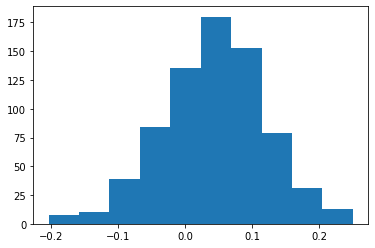

In [32]:
#we repeat the same process wiht new outcome variable. First we transform it. We substract the negative emotions from the positive emotions and then we multiply with neutrality
#we call this variable sentiment 2. As shown below its now normally distrubuted

df['sentiment2'] = (df['pos'] - df['neg'])* df['neu']


plt.hist(df['sentiment2'])

plt.show()

In [25]:
#with new variable in place we repeat the regression analyis incrementally first with the variables that we expected to be significant

lm = pg.linear_regression(df[['danceability','valence']], df['sentiment2'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.070688,0.014556,4.856265,0.000001,0.006084,0.003357,0.042111,0.099265
1,danceability,-0.051152,0.024232,-2.110919,0.035119,0.006084,0.003357,-0.098725,-0.003579
2,valence,0.011977,0.014531,0.824231,0.410078,0.006084,0.003357,-0.016550,0.040503


In [26]:
lm = pg.linear_regression(df[['danceability','valence','energy']], df['sentiment2'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.060423,0.019046,3.172529,0.001575,0.007037,0.002945,0.023032,0.097814
1,danceability,-0.048347,0.024468,-1.975898,0.048543,0.007037,0.002945,-0.096383,-0.000310
2,valence,0.007023,0.015695,0.447505,0.654644,0.007037,0.002945,-0.023789,0.037836
3,energy,0.015733,0.018819,0.836049,0.403402,0.007037,0.002945,-0.021212,0.052679


In [28]:
lm = pg.linear_regression(df[['danceability','valence','energy','liveness']], df['sentiment2'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.060138,0.019117,3.145802,0.001724,0.007086,0.001623,0.022607,0.097669
1,danceability,-0.048454,0.024491,-1.978435,0.048257,0.007086,0.001623,-0.096535,-0.000372
2,valence,0.007017,0.015705,0.446807,0.655147,0.007086,0.001623,-0.023816,0.037850
3,energy,0.015194,0.019044,0.797860,0.425212,0.007086,0.001623,-0.022193,0.052582
4,liveness,0.004053,0.021324,0.190079,0.849301,0.007086,0.001623,-0.037810,0.045917


In [29]:
lm = pg.linear_regression(df[['danceability','valence','energy','liveness','mode']], df['sentiment2'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.063707,0.019834,3.212038,0.001376,0.007716,0.000882,0.024769,0.102646
1,danceability,-0.049713,0.024570,-2.023318,0.043406,0.007716,0.000882,-0.097950,-0.001476
2,valence,0.007897,0.015764,0.500943,0.616563,0.007716,0.000882,-0.023052,0.038846
3,energy,0.013770,0.019166,0.718472,0.472697,0.007716,0.000882,-0.023857,0.051398
4,liveness,0.004073,0.021332,0.190928,0.848635,0.007716,0.000882,-0.037806,0.045952
5,mode,-0.003893,0.005735,-0.678695,0.497548,0.007716,0.000882,-0.015152,0.007367


In [30]:
lm = pg.linear_regression(df[['danceability','valence','energy','liveness','mode']], df['sentiment2'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.063707,0.019834,3.212038,0.001376,0.007716,0.000882,0.024769,0.102646
1,danceability,-0.049713,0.024570,-2.023318,0.043406,0.007716,0.000882,-0.097950,-0.001476
2,valence,0.007897,0.015764,0.500943,0.616563,0.007716,0.000882,-0.023052,0.038846
3,energy,0.013770,0.019166,0.718472,0.472697,0.007716,0.000882,-0.023857,0.051398
4,liveness,0.004073,0.021332,0.190928,0.848635,0.007716,0.000882,-0.037806,0.045952
5,mode,-0.003893,0.005735,-0.678695,0.497548,0.007716,0.000882,-0.015152,0.007367


In [31]:
lm = pg.linear_regression(df[['danceability','valence','energy','liveness','mode','instrumentalness','popularity','instrumentalness','loudness','tempo','time_signature','speechiness',]], df['sentiment2'])
lm

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.007417,0.076938,0.096408,0.923224,0.018239,0.00324,-0.143633,0.158468
1,danceability,-0.052919,0.025233,-2.097163,0.036327,0.018239,0.00324,-0.102458,-0.003379
2,valence,0.008117,0.015957,0.508700,0.611118,0.018239,0.00324,-0.023210,0.039444
3,energy,0.003112,0.026872,0.115801,0.907842,0.018239,0.00324,-0.049645,0.055868
4,liveness,0.005767,0.021364,0.269952,0.787274,0.018239,0.00324,-0.036175,0.047709
5,mode,-0.003724,0.005753,-0.647373,0.517597,0.018239,0.00324,-0.015018,0.007570
6,instrumentalness,0.043480,0.031130,1.396703,0.162933,0.018239,0.00324,-0.017637,0.104596
7,popularity,0.000208,0.000093,2.229647,0.026079,0.018239,0.00324,0.000025,0.000390
8,loudness,0.001536,0.002132,0.720342,0.471549,0.018239,0.00324,-0.002650,0.005721
9,tempo,-0.000009,0.000116,-0.077600,0.938168,0.018239,0.00324,-0.000238,0.000220


In [ ]:
#despite our modifications to the compound variables the significance levels and relationship deirections have barely changed.